In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [27]:
data1 = pd.read_csv('test1.csv')
data2 = pd.read_csv('test2.csv')
data3 = pd.read_csv('test3.csv')
data4 = pd.read_csv('test4.csv')
data=pd.concat([data1, data2, data3, data4])
print(data.shape)
data.head()
data.tail()

(239901, 1)


,val
59970,64
59971,65
59972,67
59973,66
59974,67


In [ ]:
df.to_csv(file_name, encoding='utf-8', index=False)

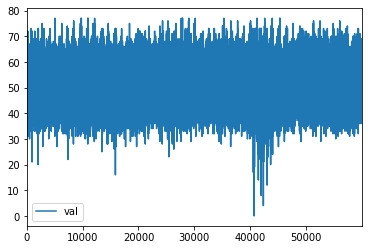

In [15]:
data.plot()

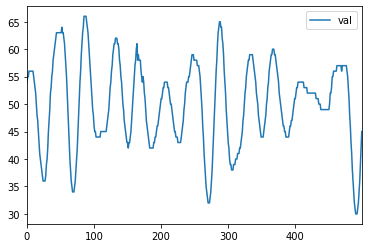

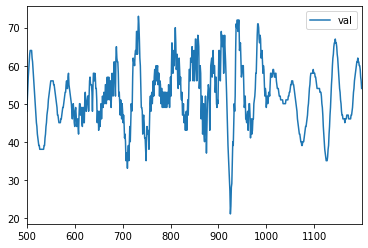

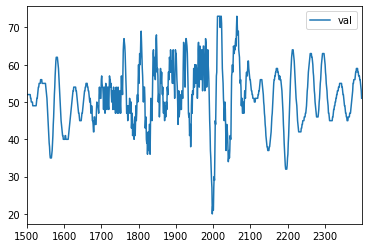

In [16]:
data[0:500].plot()
data[500:1200].plot()
data[1500:2400].plot()

/home/apurv/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/apurv/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.val   No. Observations:               239900
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -424217.633
Method:                       css-mle   S.D. of innovations              1.418
Date:                Sun, 07 Jul 2019   AIC                         848449.267
Time:                        20:18:08   BIC                         848521.982
Sample:                             1   HQIC                        848470.501
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.138e-05      0.009      0.011      0.991      -0.017       0.017
ar.L1.D.val     0.2080      0.002    103.133      0.000       0.204       0.212
ar.L2.D.val    -0.1229      0.002    -60.393    

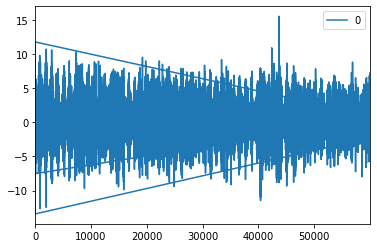

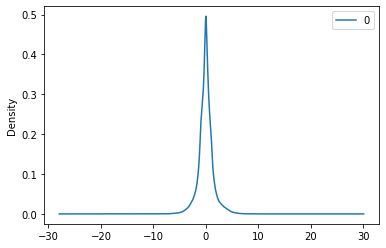

                   0
count  239900.000000
mean       -0.000007
std         1.418178
min       -13.431782
25%        -0.686224
50%        -0.000031
75%         0.627105
max        15.558263


In [47]:
from pandas import DataFrame
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [45]:
rolmean=data.rolling(window=400).mean()
rolstd=data.rolling(window=400).std()
print(rolmean,rolstd)
# rolmean.head(402)

           val
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
...        ...
59945  54.6375
59946  54.6500
59947  54.6600
59948  54.6625
59949  54.6600
59950  54.6500
59951  54.6375
59952  54.6225
59953  54.6000
59954  54.5775
59955  54.5550
59956  54.5350
59957  54.5100
59958  54.4875
59959  54.4675
59960  54.4525
59961  54.4375
59962  54.4200
59963  54.4100
59964  54.4050
59965  54.4000
59966  54.3975
59967  54.4075
59968  54.4250
59969  54.4450
59970  54.4650
59971  54.4875
59972  54.5125
59973  54.5350
59974  54.5600

[239901 rows x 1 columns]             val
0           NaN
1          

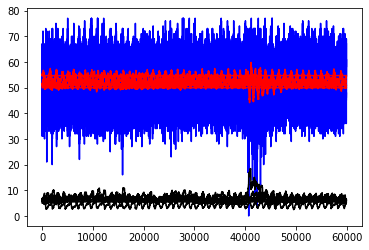

In [31]:
org=plt.plot(data,color='blue', label='Original')
mean=plt.plot(rolmean,color='red', label='Rolling Mean')
std=plt.plot(rolstd,color='black', label='Rolling Standard Deviation')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


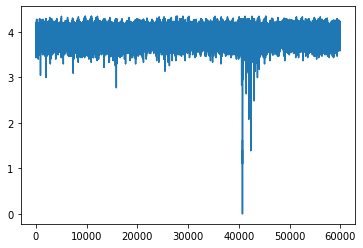

In [33]:
data_logscale=np.log(data)
plt.plot(data_logscale)

            val
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
...         ...
59945  3.995674
59946  3.995907
59947  3.996100
59948  3.996150
59949  3.996098
59950  3.995875
59951  3.995588
59952  3.995238
59953  3.994694
59954  3.994136
59955  3.993578
59956  3.993089
59957  3.992476
59958  3.991932
59959  3.991465
59960  3.991124
59961  3.990790
59962  3.990405
59963  3.990196
59964  3.990096
59965  3.989998
59966  3.989950
59967  3.990131
59968  3.990436
59969  3.990776
59970  3.991110
59971  3.991482
59972  3.991886
59973  3.992253
59974  3.992657

[239901

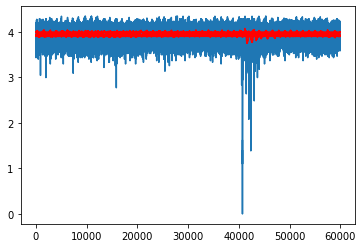

In [37]:
rolmean=data_logscale.rolling(window=400).mean()
rolstd=data_logscale.rolling(window=400).std()
print(rolmean,rolstd)
plt.plot(data_logscale)
plt.plot(rolmean,color='red')

In [ ]:
# My further approach is that I will calculate the mean (x) and standard deviation(sigma) of the whole sample
# and then in window of 400 will check if it is between x+2sigma or x-2sigma then it is snoring otherwise it is not snoring
